In [13]:
# !pip install python-louvain

In [14]:
from polygraphs.analysis import Processor
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx

In [15]:
processor = Processor(["../../CollegeMSG/"], config_check=False)
len(processor.graphs)

283

In [16]:
# picking a graph from the available graphs using indexing
graph = processor.graphs[99]

In [17]:
# Apply Label Propagation Algorithm
communities = nx.algorithms.community.label_propagation_communities(graph)

# Convert generator output to dictionary: {node: community_id}
community_mapping = {}
for community_id, nodes in enumerate(communities):
    for node in nodes:
        community_mapping[node] = community_id

In [18]:
set(community_mapping.values())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [19]:
import community as community_louvain

# Compute the best partition (Louvain method)
partition = community_louvain.best_partition(graph)

In [20]:
# Create a DataFrame
community_df = pd.DataFrame({
    "node": list(partition.keys()),
    "community": list(partition.values())
})

community_df.to_csv("community_assignments.csv", index=False)

/var/folders/1c/f0l1c8xj21b5_d53qldvsm200000gn/T/ipykernel_4217/1332921160.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', len(unique_communities))  # Get distinct colors
/Users/prudhvivuda/Documents/polygraphs/.venv/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


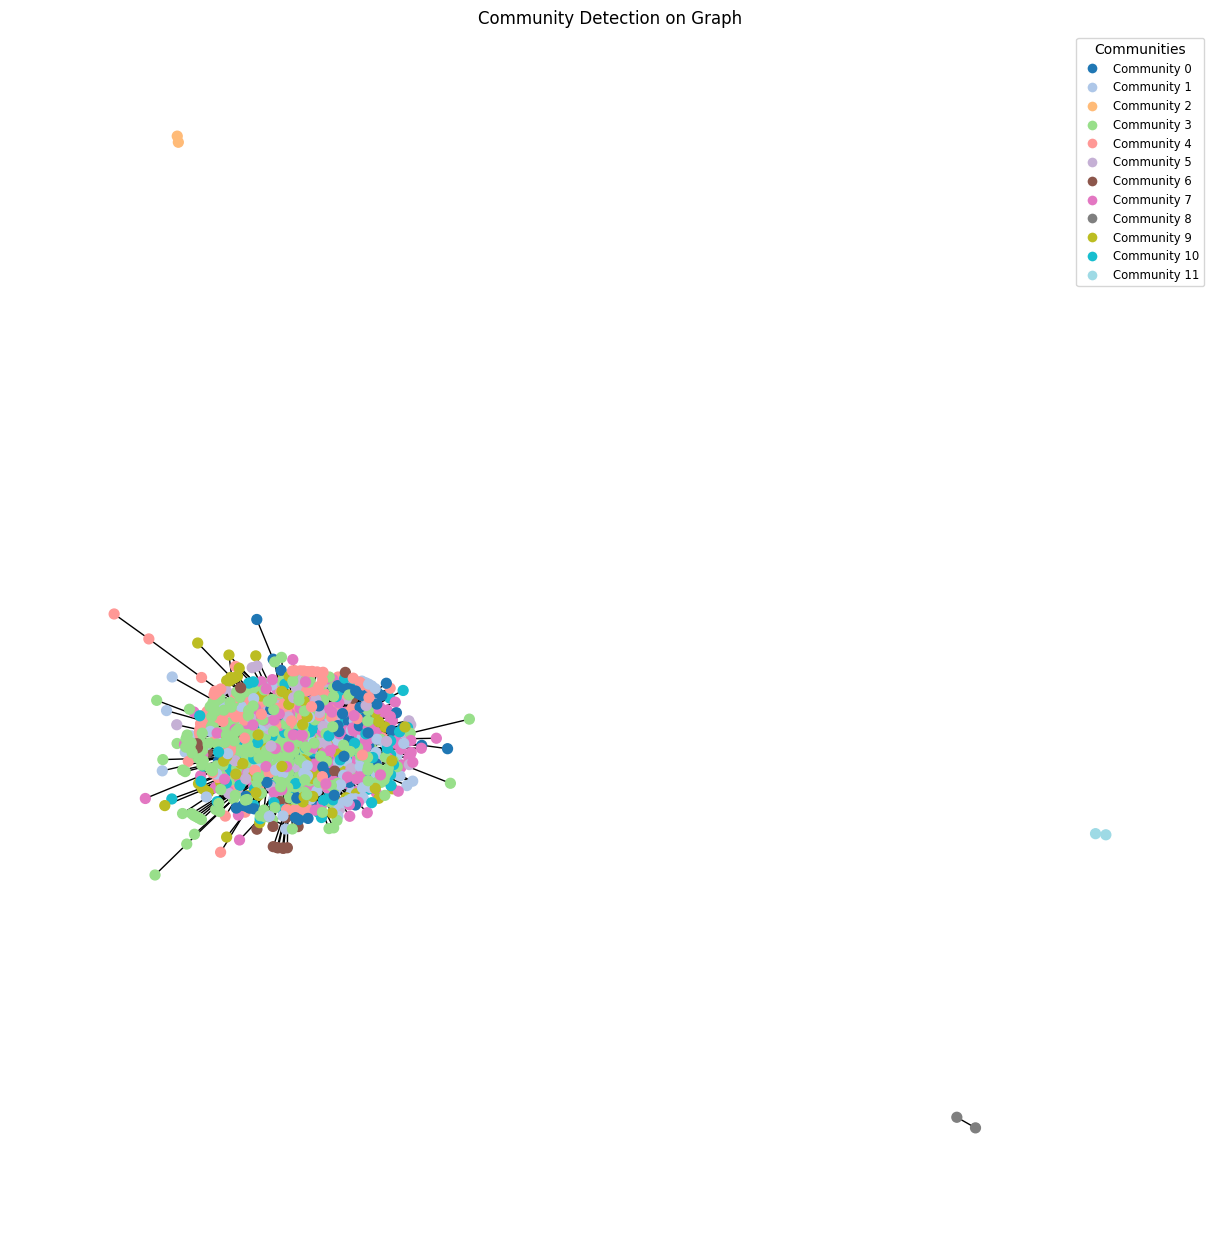

In [21]:
# Generate community colors
unique_communities = list(set(partition.values()))
color_map = cm.get_cmap('tab20', len(unique_communities))  # Get distinct colors
community_colors = {community: color_map(i) for i, community in enumerate(unique_communities)}

# Assign node colors based on their communities
node_colors = [community_colors[partition[node]] for node in graph.nodes()]

# Plot the graph
plt.figure(figsize=(12, 12))
nx.draw(
    graph,
    node_color=node_colors,
    with_labels=False,
    node_size=50,
    cmap=plt.cm.tab20
)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=community_colors[c], markersize=8, label=f"Community {c}")
    for c in unique_communities
]
plt.legend(
    handles=legend_elements,
    title="Communities",
    loc="upper right",
    fontsize='small',
    title_fontsize='medium'
)

plt.title("Community Detection on Graph")
plt.show()